# Problem Set 5 

Waleed

Gentrification in San Jose

4/22/20

### 1. Develop hypotheses involving a muli-item scale as either a dependent variable (DV) or independent variable (IV) [1 pt]

Do the following when you write your hypothesis:

    A. Write a couple sentences about the theoretical reasons (prior knowledge / research) for why you think that multiple dependent or independent variables of interest are correlated with eachother in one or more groupings
    
    I chose to look at education, family size, rent, and family income across all the pumas in San Jose.  I chose to assess these as IVs.  I wanted to see the relationship of education and family income with rent and family size.  Education and family income should be correlated with each other, but are mediated by rent and family size.  In the end I will see how well these IVs can predict poverty levels.  
    
    B. Tell us a 1-word variable name that you will assign to each multi-item scale that you think could well represent your potentially correlated variables. The 1-word variable names should reflect your theory in response to prompt A above.
    
    Expenses= family size and rent
    Finance= education and family income
    
    C. State the predicted direction of association between your dependent variable DV (multi-item scales or otherwise) and independent variables (IVs) (multi-item scales or otherwise) in your proposed model. You can predict no relationship if you do not expect a relationship.
    
    In the poverty variable (the DV) poverty level decreases as the units in the poverty variable increase. I believe expenses will have a negative relationship poverty variable, so as expenses increase poverty variable decreases.  For finances, there will be a positive relationship, so when finances increase poverty level increases as well.  
    

### 2. Estimate a correlation matrix [1 pt]

    A. The matrix should include at least 4 independent or dependent variables (but not both) that you want to include in your multi-item scales 
    B. Make a list in this markdown cell that categorizes each potential correlation as strong or weak
    
    family size & education = weak
    rent & education = weak
    family income & education = weak
    rent & family size = weak
    family income & family size = weak
    rent & family income = strong
    
    C. Standardize the 4 variables so that they are all positively correlated

In [1]:
quietly { 
clear
set more off
use "/Users/waleed/Documents/Waleed-Soc211/04212020_version.dta"
keep if puma == 8508 | puma == 8509 | puma == 8510 | puma == 8511 | puma == 8512 | puma == 8513 | puma == 8514 
gen educscale = educ
recode educscale (2/3 = 2) (5/6 = 3) (7/max =4)
tab educscale educ 

tab famsize
gen famsizescale = famsize
recode famsizescale (3/5 = 3) (6/12 = 4)
tab famsizescale famsize

tab rentgrs

gen rentscale = rentgrs
recode rentscale (300/1000 = 1) (1000/2000 = 2) (2000/3000 = 3) (3000/4000 = 4)
list rentscale in 30/50
list rentscale in 100/120
list rentscale in 1000/1020
recode rentscale (5/max = .)
recode rentscale (0 = .)
tab rentscale

tab ftotinc
gen famincscale = ftotinc
recode famincscale (min/30000 = 1) (30001/65000 = 2) (65001/90000 = 3) (90001/max = 4)

tab rentscale

}


pwcorr educscale famsizescale rentscale famincscale, sig

*tried to standardize this to remove negatives but couldn't 
/*
foreach var in educscale famsizescale rentscale famincscale {
quietly replace `var'=`var'-1
quietly replace `var'=`var'/4 if `var'!=0
}
pwcorr educscale famsizescale rentscale famincscale, sig 
*/




. pwcorr educscale famsizescale rentscale famincscale, sig

             | educsc~e famsi~le rentsc~e faminc~e
-------------+------------------------------------
   educscale |   1.0000 
             |
             |
famsizescale |  -0.2287   1.0000 
             |   0.0000
             |
   rentscale |   0.0639   0.1137   1.0000 
             |   0.0000   0.0000
             |
 famincscale |   0.0871   0.2112   0.4247   1.0000 
             |   0.0000   0.0000   0.0000
             |


### 3. Estimate factor loadings [1 pt]

    A. Estimate factor loadings for the variables you propose including in your multi-item scale(s)
    B. Rotate and plot the factor loadings
    C. Do the factor loadings support your hypothesis that multiple items should be grouped into a scale?
    
    The factor loadings do not support the hypothesis that family size and rent are related and that family income and education are related.
    
    D. Do the factor loadings suggest any proposed items should not be included in your scale? Or that an additional scale is in order?
    
    After rotating, Factor 1 shows somewhat of a relationship between family size, rent, and family income, in which case education should be removed.  Factor 2 does not show any real relationships between the variables.  


(obs=20,333)

Factor analysis/correlation                      Number of obs    =     20,333
    Method: principal factors                    Retained factors =          2
    Rotation: (unrotated)                        Number of params =          6

    --------------------------------------------------------------------------
         Factor  |   Eigenvalue   Difference        Proportion   Cumulative
    -------------+------------------------------------------------------------
        Factor1  |      0.73945      0.28375            1.0140       1.0140
        Factor2  |      0.45571      0.62726            0.6249       1.6389
        Factor3  |     -0.17156      0.12279           -0.2352       1.4036
        Factor4  |     -0.29435            .           -0.4036       1.0000
    --------------------------------------------------------------------------
    LR test: independent vs. saturated:  chi2(6)  = 8190.43 Prob>chi2 = 0.0000

Factor loadings (pattern matrix) and unique varian

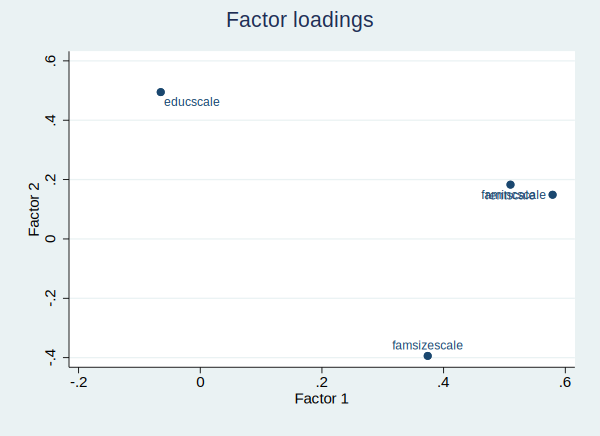

In [2]:
factor educscale famsizescale rentscale famincscale
loadingplot, norotated




Factor analysis/correlation                      Number of obs    =     20,333
    Method: principal factors                    Retained factors =          2
    Rotation: orthogonal varimax (Kaiser off)    Number of params =          6

    --------------------------------------------------------------------------
         Factor  |     Variance   Difference        Proportion   Cumulative
    -------------+------------------------------------------------------------
        Factor1  |      0.70450      0.21384            0.9661       0.9661
        Factor2  |      0.49066            .            0.6728       1.6389
    --------------------------------------------------------------------------
    LR test: independent vs. saturated:  chi2(6)  = 8190.43 Prob>chi2 = 0.0000

Rotated factor loadings (pattern matrix) and unique variances

    -------------------------------------------------
        Variable |  Factor1   Factor2 |   Uniqueness 
    -------------+--------------------+----

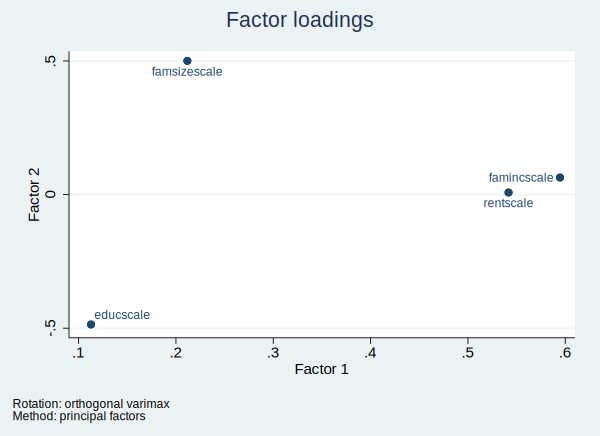

In [4]:
quietly factor educscale famsizescale rentscale famincscale
rotate, varimax
loadingplot

### 4. Calculate the scales and test them in a regression model [1 pt]

    A. Generate new scale variables that average all the items in eacj scale.
    B. Standardize each scale to be 0-1
    C. Estimate separate models that regress your dependent variables on your independent variables 1) using the scale variables, and 2) using the separate component items of the scale variables
    D. Output your models (at least 2 models) using esttab so we can easily compare results

In [5]:
gen expenses=(famsizescale+rentscale)/2
gen finances=(educscale+famincscale)/2

sum expenses finances 

foreach var in expenses finances educscale famsizescale rentscale famincscale {
quietly replace `var'=`var'-1
quietly replace `var'=`var'/4 if `var'!=0
}
sum expenses finances educscale famsizescale rentscale famincscale

quietly {
est clear

In [10]:
quietly {
est clear
eststo: reg poverty expenses finances i.race i.puma i.hispan, ro
eststo: reg poverty expenses finances educ famsize ftotinc rentgrs i.race i.puma i.hispan, ro

}
esttab ///
, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
	legend starlevels(^ .1 * .05 ** .01 *** .001) ///
collabels(none)



. esttab , stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(2)) se(fmt(2) par)) stardetach   legend starlevels(^ .1 * .05 ** .01 *** .001) collabels(none)

----------------------------------------------
                      (1)              (2)    
                  poverty          poverty    
----------------------------------------------
expenses           138.69 ***       119.08 ***
                   (5.33)          (11.66)    
finances           444.69 ***       758.98 ***
                   (3.43)           (5.48)    
1.race               0.00             0.00    
                      (.)              (.)    
2.race             -36.92 ***       -26.34 ***
                   (4.83)           (4.05)    
3.race             -28.97 ***       -22.04 ** 
                   (8.51)           (7.02)    
4.race             -33.17 ***       -15.40 ***
                   (4.90)           (4.22)    
5.race              19.62 *          14.90 *  
                   (7.90)           (6

### 5. Interpret your regression estimates [1 pt]

    A. Which of your hypotheses were supported or rejected?
    
    My hypothesis was rejected finances does not seem to be negatively associated with poverty the poverty variable (which as the units go up, poverty level decreases).
    
    B. Were the coefficients using your multi-item scales in the same direction as the coefficients for their component variables?
    
    Education and family size were negatively associated with poverty, rent and family income were neutral
    
    
    C. Were the coefficients larger or more statistically significant when you used multi-item scales?
    
    The coefficients of the multi-item scales were larger, but had the same significance.